<h4 align="center">Baysian NN and Frequentist NN for the Active Learning</h4>
<p>Here, we compare the results of Baysian NN and Frequentist NN in the Active Learning Setting. Especially, where we compare against the proposed One-Shot Uncertainty estimation.<p>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import pandas as pd
import os

In [2]:
plot_pth = 'OneShotBayesianVsDropout/'
class getMetric():

    def __init__(self, type, pth):
        self.files = [f for f in os.listdir(pth)]
        self.files = sorted(self.files, key=lambda x: int(x.split('round')[1].split('.csv')[0]))
        if type == 'accuracy':
            indx = 10
        # classification error
        self.metric = [1 - pd.read_csv(pth + f).iloc[indx][1] for f in self.files][:40]

def PlotGraph(figure_nam,data_locs,labels):
    metric_list = [getMetric('accuracy',pth).metric for pth in data_locs]
    rounds = range(len(metric_list[0]))
    colors = ['#9B59B6','#76D7C4','#F5B041','#E74C3C','#2C3E50']
    markers = ['o','o','o','^','^']

    font = {'family': 'Serif',
            'weight': 'normal',
            'size': 14}
    rc('font', **font)
    if not figure_nam:
        figure_nam = 'my_fig.png'
    plt.figure(num=1, figsize=(14, 7))
    ax = plt.axes()
    for i,m in enumerate(metric_list):
        ax.plot(rounds, m, marker=markers[i], color=colors[i], label=labels[i])

    ax.set_ylabel('classification error', fontsize=18)
    ax.set_xlabel(r'# samples ($\times 50$)', fontsize=18)
    ax.legend(loc=1, ncol=1, frameon=True)
    plt.savefig(plot_pth+figure_nam, orientation='portrait', bbox_inches='tight', dpi=300)

<h3 align="center"> MNIST Dataset </h3>

2020-03-31 17:50:56 
<font size="3"><b> Exprimental Setting </b></font>
    <li><b>KL scaling factor: </b>$\frac{1}{\#SamplesPerBatch}$. This is <font color="red"> extremely important</font> since changing this will result in wide performance changes. In most cases, I found other Kl scaling factor to be detrimental to MNIST data. In the implementation this is indicated by the variable <i><font color="blue">standard2</font></i>.</li>
    <li><b>Training batch size</b>: 100</li>
    <li><b>Partial complete retraining:</b> To avoid classification error for both training and test creaping up after 10-15 epochs. I <font color="red">retrain the model from scratch after every 13 epochs</font>. This is why you see an increase in the classification error after every 13th epoch. Albeit, this is another important step.</li>
    <li><b>Number of MCMC samples</b>: 5</li>
    <li><b>Optimization Algorithm</b>: Adam</li>
<font size="3"><b> Exprimental Setting for Dropout neural network (NN)</b></font>
<li>Batch Size: 32</li>
<li>Dropout Rate: 0.25</li>
<li><b>Optimization Algorithm</b>: Adam</li>
<li><b>Number of NN instantiations</b>: 25. That is, when performing active learning, we create 25 instantiations of NN with dropout and estimate variation-ratio and entropy.</li>
The legend used in the graph are as follows:
AL stands for <u>a</u>ctive <u>l</u>earning with dropout-based neural network, <font color="blue">AL-VR</font> stands for <b><u>a</u>ctive <u>l</u>earning using <u>v</u>ariation-<u>r</u>atio</b>, <font color="blue">AL-E</font> stands for <u>a</u>ctive <u>l</u>earning using <u>E</u>ntropy, RS stands for <u>r</u>andom <u>s</u>ampling, legends with the character <font color="blue">B</font> in front of them are the Bayesian couter parts of the variational-ratio and entropy active-learning algorithms respectively.

All the results were obtained with an ensemble 25 instantiations of NN. The graphs here are the average prediction accuracies.
</p>

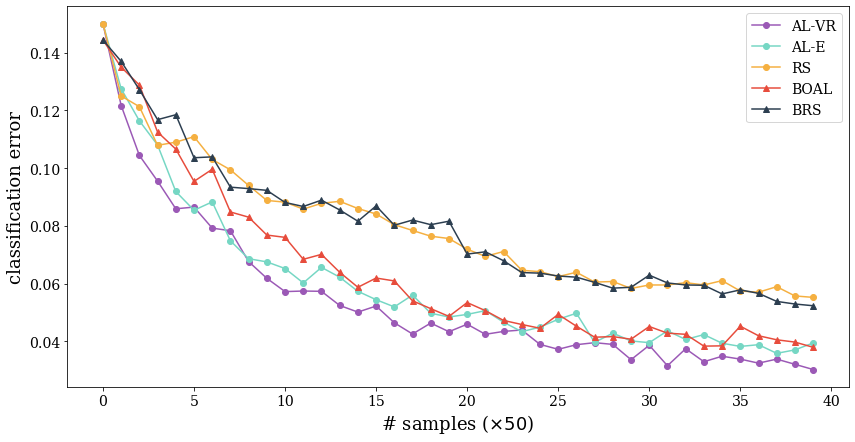

In [3]:
# 500 initial samples
pth_1 = '../results_archive/McDropout/lenet300-100_mnist_isample500_e20_r40_ac1_b32_retrain0_variation-ratio/'
pth_2 = '../results_archive/McDropout/lenet300-100_mnist_isample500_e20_r40_ac1_b32_retrain0_entropy/'
pth_3 = '../results_archive/McDropout/lenet300-100_mnist_isample500_e20_r40_ac0_b32_retrain0/'
# bayesian results
pth_4 = '../results_archive/Blenet300-100_mnist_isample500_e15_r41_ac1_b100_Klreg-standard2_retrain0/'
pth_5 = '../results_archive/Blenet300-100_mnist_isample500_e15_r41_ac0_b100_Klreg-standard2_retrain0/'
locs = [pth_1, pth_2, pth_3, pth_4,pth_5]
labels = ['AL-VR','AL-E','RS','BOAL','BRS']
f_name = 'fig_a'
PlotGraph(f_name,locs,labels)

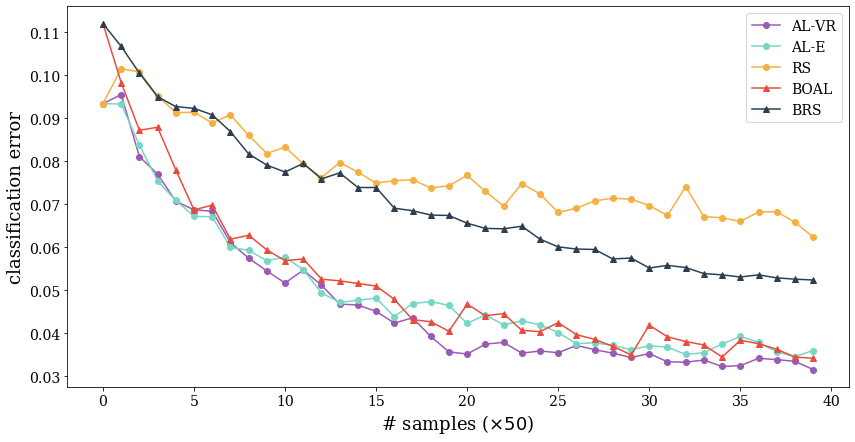

In [4]:
# 1000 initial samples
pth_1 = '../results_archive/McDropout/lenet300-100_mnist_isample1000_e20_r40_ac1_b32_retrain0_variation-ratio/'
pth_2 = '../results_archive/McDropout/lenet300-100_mnist_isample1000_e20_r40_ac1_b32_retrain0_entropy/'
pth_3 = '../results_archive/McDropout/lenet300-100_mnist_isample1000_e20_r40_ac0_retrain0/'
# bayesian results
pth_4 = '../results_archive/Blenet300-100_mnist_isample1000_e15_r41_ac1_b100_Klreg-standard2_retrain0/'
pth_5 = '../results_archive/Blenet300-100_mnist_isample1000_e15_r51_ac0_b100_Klreg-standard2_retrain0/'
locs = [pth_1, pth_2, pth_3, pth_4,pth_5]
labels = ['AL-VR','AL-E','RS','BOAL','BRS']
f_name = 'fig_b'
PlotGraph(f_name,locs,labels)

<h3 align="center"> Fashion MNIST Dataset </h3>

<p>With 500 initial samples. The KL scaler used for MNIST does not work for Fashion MNIST. Here we use Blundell. That being said the KL scaler <b>Standard2</b> does work very well after partial retraining as we did for MNIST, but this does not result in bayesian random beating the proposed One-Shot.<font color="red">need to update this</font></p>

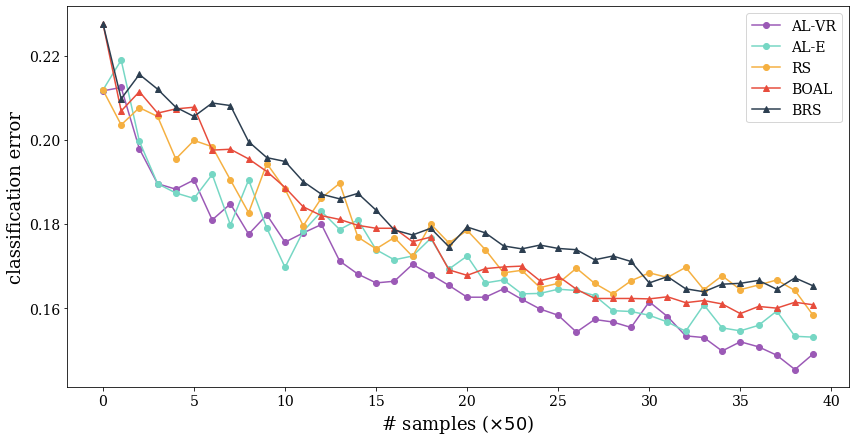

In [6]:
# 500 initial samples - need to replot this, this is with 1000
pth_1 = '../results_archive/McDropout/lenet300-100_fmnist_isample500_e20_r40_ac1_b32_retrain0_variation-ratio/'
pth_2 = '../results_archive/McDropout/lenet300-100_fmnist_isample500_e20_r40_ac1_b32_retrain0_entropy/'
pth_3 = '../results_archive/McDropout/lenet300-100_fmnist_isample500_e20_r40_ac0_b32_retrain0/'
# bayesian results
pth_4 = '../results_archive/Blenet300-100_fmnist_isample500_e15_r51_ac1_retrain0/'
pth_5 = '../results_archive/Blenet300-100_fmnist_isample500_e15_r51_ac0_retrain0/'
locs = [pth_1, pth_2, pth_3, pth_4, pth_5]
labels = ['AL-VR','AL-E','RS','BOAL','BRS']
f_name = 'fig_c'
PlotGraph(f_name,locs,labels)

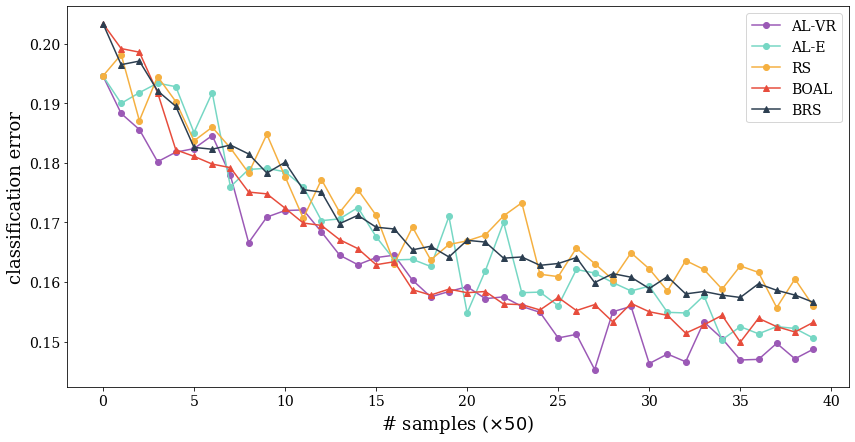

In [7]:
# 1000 initial samples
pth_1 = '../results_archive/McDropout/lenet300-100_fmnist_isample1000_e20_r40_ac1_b32_retrain0_variation-ratio/'
pth_2 = '../results_archive/McDropout/lenet300-100_fmnist_isample1000_e20_r40_ac1_b32_retrain0_entropy/'
pth_3 = '../results/McDropout/lenet300-100_fmnist_isample1000_e20_r40_ac0_b32_retrain0/'
# bayesian results
pth_4 = '../results_archive/Blenet300-100_fmnist_isample1000_e15_r51_ac1_retrain0/'
pth_5 = '../results_archive/Blenet300-100_fmnist_isample1000_e15_r51_ac0_retrain0/'
locs = [pth_1, pth_2, pth_3, pth_4, pth_5]
labels = ['AL-VR','AL-E','RS','BOAL','BRS']
f_name = 'fig_d'
PlotGraph(f_name,locs,labels)